In [1]:
import pandas as pd

In [5]:
#Setting up Titanic csv file as DateFrame

titanic_df = pd.read_csv('train.csv')

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#We can know the details on column category and can think of few questions and will try to answer using basic data analysis skills

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Let's assume few questions and try using Data Analysis tools to obtain insights from the Data.

#Question 1 - Who were the passengers on the Titanic? (On basis of - Ages, Gender, Class)
#Question 2 - What deck were the passengers on and how does that relate to their class?
#Question 3 - Where did the passengers come from?
#Question 4 - Who was alone and who was with family?
#Question 5 - What factors helped someone survive the sinking?


#Question 1 - Who were the passengers on the Titanic?

import seaborn as sns

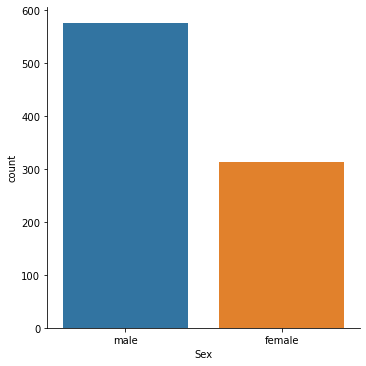

In [28]:
#First we can check the passangers on the basis of gender.

sns.catplot(x='Sex',kind='count',data=titanic_df)

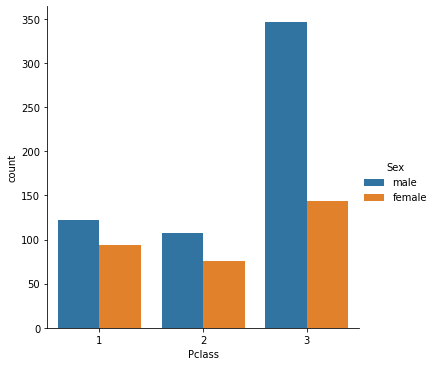

In [29]:
#We can divide it on the basis of classes.

sns.catplot(x='Pclass',kind='count',data=titanic_df,hue='Sex')

In [31]:
#We can split on further more as Male Female and Child (We can consider Everyone below 16yrs as Child)
#Made a function to sort through sex

def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    
#We can create a new column as Person and it will be on the basis of Male, Female and Child.   
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [33]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


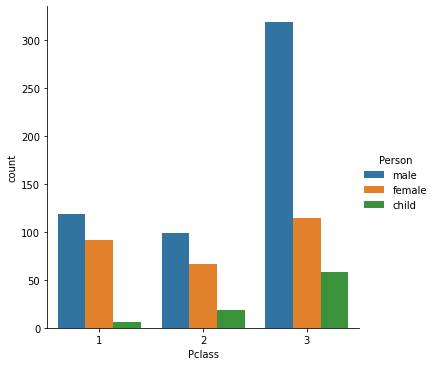

In [35]:
sns.catplot(x='Pclass',kind='count',data=titanic_df,hue='Person')

<AxesSubplot:>

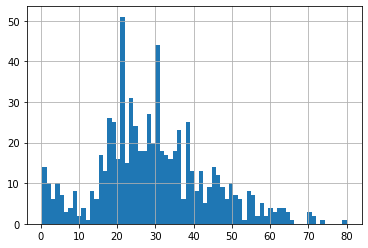

In [36]:
#We can check on the basis of Age as well
titanic_df['Age'].hist(bins=70)

In [37]:
#We could also get a quick overall comparison of male, female and child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

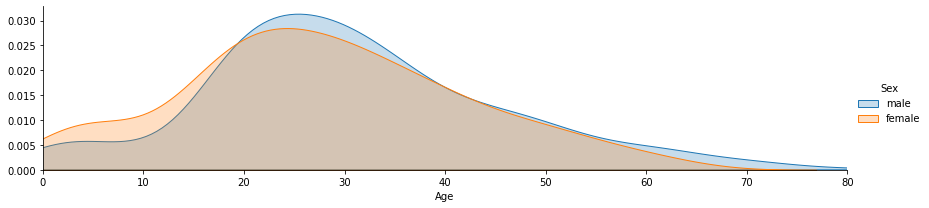

In [44]:
#We'll visualize the data is to use FacetGrid to plot multiple kedplots on one plot

#Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

#We'll use map to plot all the possible kdeplots for the 'Age' column
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally we will add a legend
fig.add_legend()

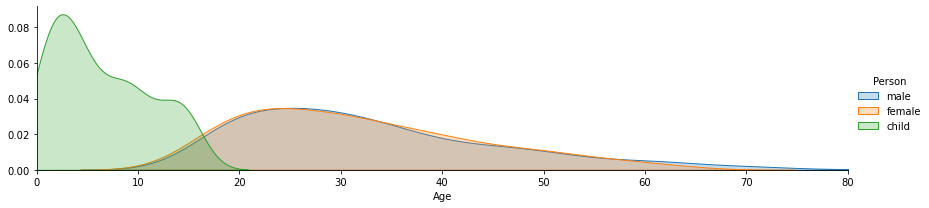

In [46]:
#We can do the same thing for the 'person' column to include children-

fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

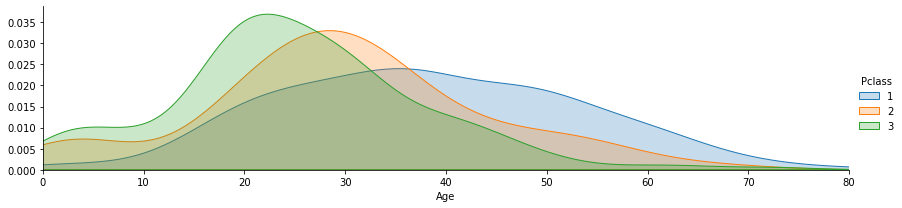

In [47]:
#We can do the same for class-

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [48]:
#Question 2 - What deck were the passangers on and how does that relate to their class?

#There are a lot of null values in Cabin. So, first we'll drop all NaN values and create a new object {Deck}

deck = titanic_df['Cabin'].dropna()

In [49]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [56]:
from pandas import DataFrame

In [68]:
#After noticing we know that only first letter of deck is required for the classification of LEVELS 
#So we make a loop to take the first letter seperately 

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
print(cabin_df.value_counts())

Cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
dtype: int64


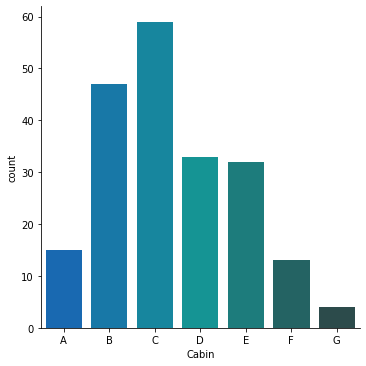

In [69]:
sns.catplot(x='Cabin',kind='count',data=cabin_df,order=['A','B','C','D','E','F','G'],palette='winter_d')

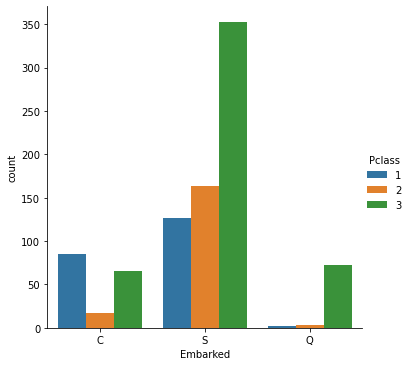

In [73]:
#As given in Kaggle Embarked columns tells us about the Port Of Embarkation of Individual Passenger and there were only three
#ports as C, S and Q which stands for Cherbourg, Southhampton and Queenstown

sns.catplot(x='Embarked',data=titanic_df,kind#3rd Question - Where did the passengers come from?
='count',hue='Pclass',order=['C','S','Q'])

In [74]:
#4th Question - Who was alone and who was with family?

#Creating a new column Alone

titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [75]:
#Looking for >0 or ==0 to set alone or with family status

titanic_df['Alone'].loc[titanic_df['Alone']>0]= 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]= 'Alone'

C:\Users\Sudheer\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


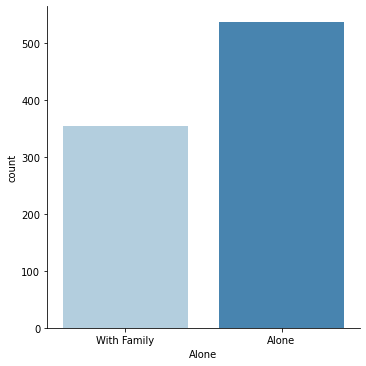

In [77]:
sns.catplot(x='Alone',kind='count',data=titanic_df,palette='Blues')

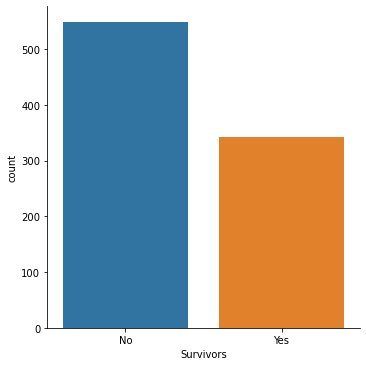

In [78]:
#Question 5 What helped someone survive the sinking?
#we can use map to make 0s and 1s as Yes and No in a new coulumn called Survived

titanic_df['Survivors'] = titanic_df.Survived.map({0:'No',1:'Yes'})
sns.catplot(x='Survivors',kind='count',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

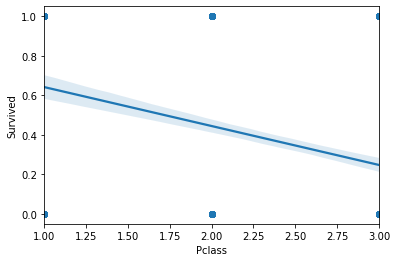

In [85]:
#We can check if the class of passengers had an effect on their survival rate.

sns.regplot(x='Pclass',y='Survived',data=titanic_df)

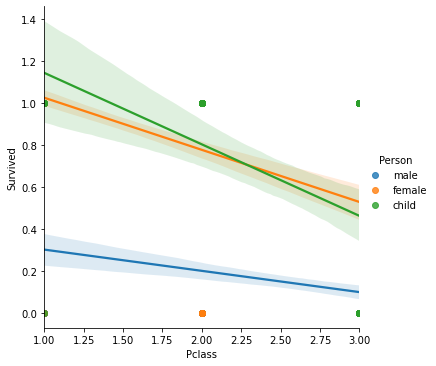

In [87]:
sns.lmplot(x='Pclass',y='Survived',data=titanic_df,hue='Person')

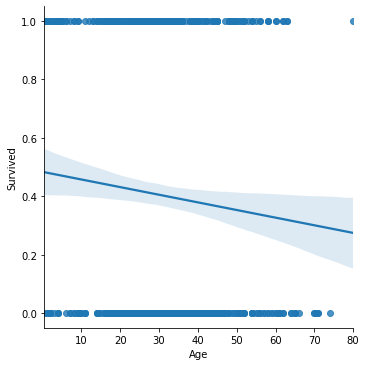

In [89]:
#We can check if age had an effect on the Survival Rate.

sns.lmplot(x='Age',y='Survived',data=titanic_df)

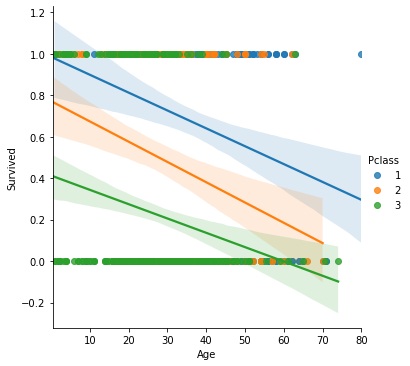

In [92]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

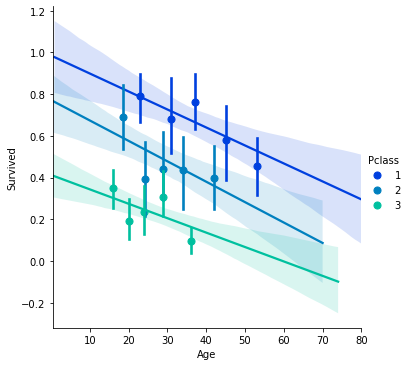

In [98]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=5)

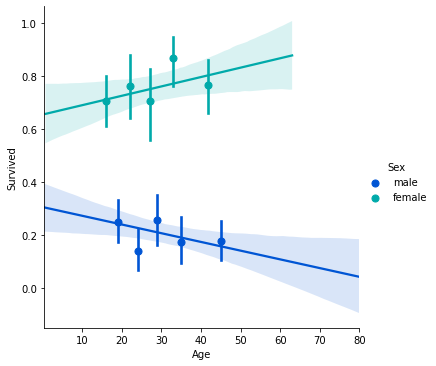

In [99]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=5)